# Recurrent neural networks for sequence modelling

* Workshop on Neural Networks and Deep Learning, December 2020

## Sequence modelling

* Datasets where data points are entire sequences
* Sequences possibly of different lengths
* Examples, sequences can be of:
    - Natural language words
    - DNA or RNA nucleotides
    - Protein amino acids
    - Continuous sensor data over discretized time
* This lecture: modelling using recurrent neural networks

## Examples 

- Classification, here phylum of 16S ribosomal RNA reads: 
```python
f('TAGATAGTTGGTGGGGTAATGGCCTACCAAGTCTACGA') = Proteobacteria
f('TGCCGTGAGGTGGAGCGAATCCCTAAAAGCCGGTCTCA') = Actinobacteria
```

- Natural language next word prediction (language model): 
```python
g("It's important what the quality of the assemblies of these reads") = "is"
```

- Protein carbon atom position prediction (protein tertiary structure):
```python
h('AYTNSFTRG'...) =  [ (195.359, 179.799, 144.920),
                         (192.419, 175.841, 147.667),
                         (189.946, 180.058, 150.059), ... ]
```

## Examples 

- Classification: many-to-one (one output per sequence)
```python
f('TAGATAGTTGGTGGGGTAATGGCCTACCAAGTCTACGA') = Proteobacteria
f('TGCCGTGAGGTGGAGCGAATCCCTAAAAGCCGGTCTCA') = Actinobacteria
```

- Language model: many-to-many (only one output shown here) 
```python
g("It's important what the quality of the assemblies of these reads") = "is"
```

- "Regression": many-to-many (continuous outputs)
```python
h('AYTNSFTRG'...) =  [ (195.359, 179.799, 144.920),
                         (192.419, 175.841, 147.667),
                         (189.946, 180.058, 150.059), ... ]
```

## Simple sequence modelling techniques

```python
g("It's important what the quality of the assemblies of these reads") = "is"
```

- Fixed windows
    ```python
    g1("the assemblies of these reads") = "are" # ??
    ```

- Bag of words
    ```python
    g2({"assemblies":1, "quality":1, "reads":1, ...}) = "are" # ??        
    ```

## Modelling sequences with recurrent neural networks

Let the inputs be $x_0, \cdots, x_t$ and encode them to $h_0, \cdots, h_t$. Run them through the _same_ neural network $A$ with $x_t$ and $h_{t-1}$ as inputs.

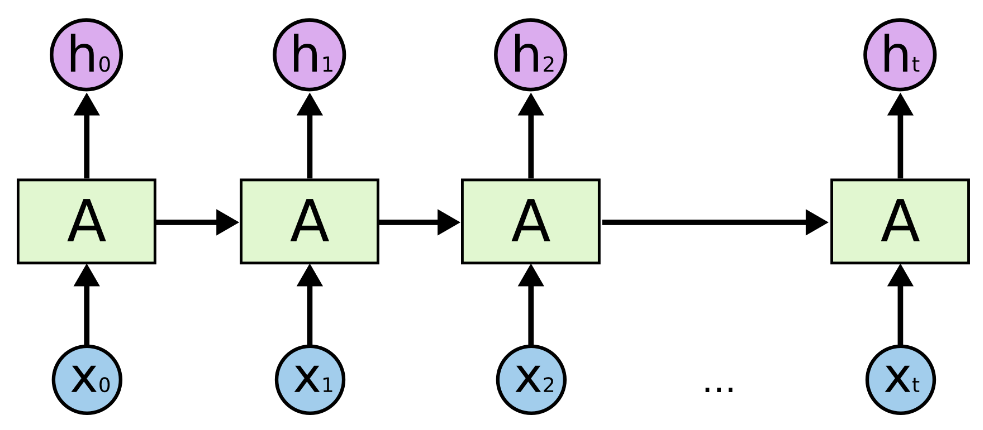

Simplest such A to try: FFNN. Elman Recurrent Neural Network [(1990)](https://onlinelibrary.wiley.com/doi/abs/10.1207/s15516709cog1402_1), in keras `SimpleRNN`:

\begin{align}
h_t &= \tanh(W x_t + U h_{t-1} + b)
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector
* $h_t \in \mathbb{R}^{h}$: hidden state, also the output vector
* $W \in \mathbb{R}^{h \times d}$, $U \in \mathbb{R}^{h \times h} $ and $b \in \mathbb{R}^{h}$: weight matrices and biases

**Weight sharing**: same weights - same A - are used at every time step.

_Image credit: Christopher Olah_

## Vanishing gradients

Elman RNN suffers from vanishing gradients because we multiply many small numbers in $(-1, 1)$ from the $\tanh$. Signal decays exponentially. 

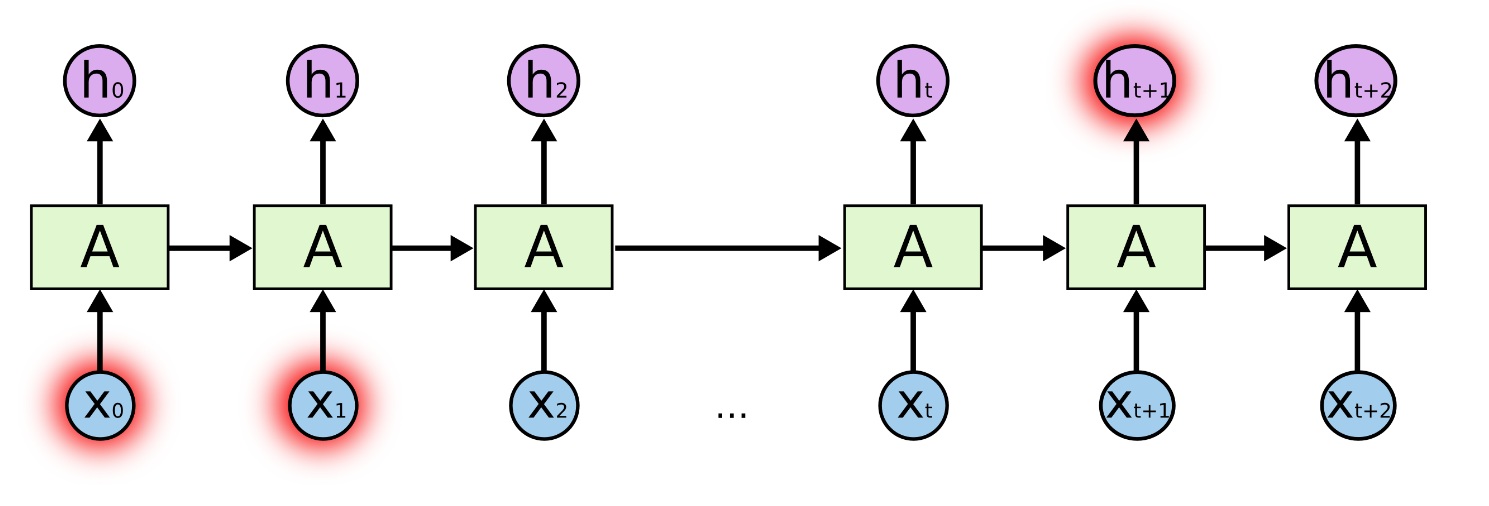

More reading: _On the difficulty of training Recurrent Neural Networks_ [Pascanu et al (2012)](https://arxiv.org/abs/1211.5063)

## Long Short-Term Memory (LSTM)

[Hochreiter & Schmidhuber (1997)](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory). I don't need you to understand this fully! But here goes:

\begin{align}
f_t &= \sigma(W_{f} x_t + U_{f} h_{t-1} + b_f) \\
i_t &= \sigma(W_{i} x_t + U_{i} h_{t-1} + b_i) \\
o_t &= \sigma(W_{o} x_t + U_{o} h_{t-1} + b_o) \\
c_t &= f_t \circ c_{t-1} + i_t \circ \tanh(W_{c} x_t + U_{c} h_{t-1} + b_c) \\
h_t &= o_t \circ c_t \\
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $f_t \in \mathbb{R}^{h}$: forget gate's activation vector
* $i_t \in \mathbb{R}^{h}$: input/update gate's activation vector
* $o_t \in \mathbb{R}^{h}$: output gate's activation vector
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $W \in \mathbb{R}^{h \times d}$, $U \in \mathbb{R}^{h \times h} $ and $b \in \mathbb{R}^{h}$: weight matrices and biases
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Long Short-Term Memory (LSTM)

Let's write $\sigma_f(x, h)$ for $\sigma(W_f x + U_f h + b_f)$ with learnable $W_f \in \mathbb{R}^{h \times d}$, $U_f \in \mathbb{R}^{h \times h} $ and $b_f \in \mathbb{R}^{h}$ and so on for $\sigma_i$, $\sigma_o$ and $\tanh_c$ with their own learnable parameters:

\begin{align}
f_t &= \sigma_f(x_t, h_{t-1}) \\
i_t &= \sigma_i(x_t, h_{t-1}) \\
o_t &= \sigma_o(x_t, h_{t-1}) \\
c_t &= f_t \circ c_{t-1} + i_t \circ \tanh_c(x_t, h_{t-1}) \\
h_t &= o_t \circ c_t
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $f_t \in \mathbb{R}^{h}$: forget gate's activation vector
* $i_t \in \mathbb{R}^{h}$: input/update gate's activation vector
* $o_t \in \mathbb{R}^{h}$: output gate's activation vector
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Long Short-Term Memory (LSTM)

Let's write $\sigma_f(x, h)$ for $\sigma(W_f x + U_f h + b_f)$ with learnable $W_f \in \mathbb{R}^{h \times d}$, $U_f \in \mathbb{R}^{h \times h} $ and $b_f \in \mathbb{R}^{h}$ and so on for $\sigma_i$, $\sigma_o$ and $\tanh_c$ with their own learnable parameters:

\begin{align}
c_t &= \sigma_f(x_t, h_{t-1}) \circ c_{t-1} + \sigma_i(x_t, h_{t-1}) \circ \tanh_c(x_t, h_{t-1}) \\
h_t &= \sigma_o(x_t, h_{t-1}) \circ c_t
\end{align}

* $x_t \in \mathbb{R}^{d}$: input vector to the LSTM unit
* $h_t \in \mathbb{R}^{h}$: hidden state vector: output vector of the LSTM unit
* $c_t \in \mathbb{R}^{h}$: cell state vector
* $f$: forget, $i$: input, $o$: output
* $\circ$ elementwise multiplication $\mathbb{R}^h \times \mathbb{R}^h \to \mathbb{R}^h$

## Running synthetic example: particle on a 2D random walk

* Example to illustrate:
    * many-to-many
    * many-to-one
    * categorical inputs and outputs
    * continuous inputs and outputs
    * how to examine a trained network
    
```
#####            #####
## ##            ## ##        x: particle
#   #            # x #        #: obstruction
# x #  ->  U ->  #   #
#   #            #   #
#####            #####
```

We observe a sequence of directions of movements, such as `ULDDRURDLUUU`. Key: **D**own, **U**p, **L**eft, **R**ight.

### First model: sequences to coordinates

Some example inputs and outputs we want a model `f` to capture:

```python
f("U") = [(2, 2)]
f("UL") = [(2, 2), (1, 2)]
f("ULD") = [(2, 2), (1, 2), (1, 3)]
```

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
import numpy as np
import pandas as pd
from pprint import pprint as pp
import seaborn as sns
from matplotlib import pyplot as plt
rng = np.random.default_rng()
sns.set_style('whitegrid')
sns.set_palette("tab10")   

# Change this to 1 to see keras progress bar when training 
VerboseFlag = 0

In [2]:
def step(x, y, d, step_size=1):
    if d == 'D': y += step_size   
    if d == 'U': y -= step_size
    if d == 'L': x -= step_size 
    if d == 'R': x += step_size
    return x, y

world = '''
#####
## ##
#   #
# x #
#   #
#####
'''.strip().split('\n')

def inside(x, y):
    return 0 <= y < len(world) and 0 <= x < len(world[int(y)]) and world[int(y)][int(x)] != '#'

unobstructed = [(x, y) 
                for y, row in enumerate(world) 
                for x, char in enumerate(row) 
                if char in ' x']
[[start_x, start_y]] = [ (x, y) for x, y in unobstructed if world[y][x] == 'x']

def starting_position(randomly=False):
    if randomly:
        return rng.choice(unobstructed)
    else:
        return start_x, start_y

In [3]:
def alts_at(x, y):
    alts = ''
    for d in 'DULR':
        if inside(*step(x, y, d)):
            alts += d
    return alts

[
    ','.join([
        (alts_at(x, y) if inside(x, y) else '').rjust(4)
        for x in range(5)
    ])    
    for y in range(6)   
]

['    ,    ,    ,    ,    ',
 '    ,    ,   D,    ,    ',
 '    ,  DR,DULR,  DL,    ',
 '    , DUR,DULR, DUL,    ',
 '    ,  UR, ULR,  UL,    ',
 '    ,    ,    ,    ,    ']

In [4]:
def randstep(x, y, step_size=1):
    alts = alts_at(x, y)
    d = rng.choice(list(alts)) if alts else ''
    x, y = step(x, y, d, step_size)
    return dict(x=x, y=y, d=d)

In [5]:
def simulate(Timesteps):
    x, y = starting_position(randomly=False)
    rows = []
    for t in range(Timesteps):
        row = randstep(x, y)
        x, y = row['x'], row['y']
        row['t'] = t
        rows += [row]
    return pd.DataFrame(rows) 

simulate(5)

,x,y,d,t
0,2,2,U,0
1,2,3,D,1
2,2,2,U,2
3,2,1,U,3
4,2,2,D,4


In [6]:
dfs = []
N = 1000
T = 30
for i in range(N):
    df = simulate(T)
    df['sim'] = i
    dfs += [df]
df = pd.concat(dfs, axis='index').reset_index(drop=True)

In [7]:
df['pos'] = (df.x).map(str) + ',' + (df.y).map(str)
df.pos = df.pos.where(df.pos != '2,1', '2,1*')

In [8]:
df.pivot('sim', 't')

x                             ...  pos                                  \
t   0  1  2  3  4  5  6  7  8  9   ...   20    21   22    23   24   25   26   
sim                                ...                                        
0    3  2  2  3  2  3  3  3  2  2  ...  3,3   3,2  2,2   2,3  2,4  3,4  3,3   
1    1  2  2  1  1  1  2  1  2  1  ...  1,3   1,2  2,2   2,3  2,2  3,2  3,3   
2    3  3  3  3  3  3  3  3  2  1  ...  2,4   3,4  3,3   3,4  2,4  3,4  2,4   
3    3  2  1  1  1  2  2  2  2  1  ...  2,2   1,2  1,3   1,4  2,4  3,4  2,4   
4    2  1  1  2  3  2  2  2  2  2  ...  1,3   1,4  2,4   1,4  2,4  1,4  1,3   
..  .. .. .. .. .. .. .. .. .. ..  ...  ...   ...  ...   ...  ...  ...  ...   
995  1  1  1  1  2  2  2  3  2  3  ...  2,2   1,2  2,2   2,3  2,4  3,4  3,3   
996  2  1  2  3  3  3  3  2  2  3  ...  1,3   1,2  2,2   1,2  1,3  1,4  2,4   
997  2  3  3  3  3  3  3  3  3  3  ...  2,2  2,1*  2,2  2,1*  2,2  3,2  2,2   
998  2  2  3  3  3  2  1  1  2  3  ...  1,3   1,2  2,2   3,2  2,2  3,2  2,2   
999  2  1  2  1  2  1  1  1  2  2  ...  2,4   2,3  2,4   1,4  1,3  2,3  2,2   

                     
t      27   28   29  
sim                  
0     2,3  3,3  3,4  
1     3,2  3,3  3,2  
2     3,4  3,3  2,3  
3     3,4  2,4  3,4  
4     1,2  2,2  3,2  
..    ...  ...  ...  
995   3,4  2,4  1,4  
996   3,4  2,4  3,4  
997   3,2  2,2  1,2  
998  2,1*  2,2  3,2  
999  2,1*  2,2  1,2  

[1000 rows x 120 columns]

The neural network only accept numeric inputs. Translate DULR chars to int keys:

In [9]:
tr = dict(zip('DULR', range(4)))
tr

{'D': 0, 'U': 1, 'L': 2, 'R': 3}

In [10]:
df['d_tr'] = df.d.map(tr)
df.pivot('sim', 't').d_tr

t,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
sim,,,,,,,,,,,,,,,,,,,,,
0,3,2,0,3,2,3,1,0,2,1,...,3,1,2,0,0,3,1,2,3,0
1,2,3,0,2,1,1,3,2,3,2,...,2,1,3,0,1,3,0,1,0,1
2,3,0,1,0,1,1,0,1,2,2,...,2,3,1,0,2,3,2,3,1,2
3,3,2,2,0,1,3,1,1,0,2,...,3,2,0,0,3,3,2,3,2,3
4,0,2,1,3,3,2,1,0,1,0,...,2,0,3,2,3,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,0,0,3,1,0,3,2,3,...,0,2,3,0,0,3,1,0,2,2
996,1,2,3,3,0,0,1,2,1,3,...,0,1,3,2,0,0,3,3,2,3
997,1,3,0,1,0,0,1,1,0,0,...,1,1,0,1,0,3,2,3,2,2


### Data to numpy matrices

Apply `zmuv`, _zero mean and unit variance_, to positions to avoid having the network spend time on learning biases.

In [11]:
def zmuv(d, axis=None):
    '''Zero mean, unit variance'''
    return (d - d.mean(axis=axis)) / (d.std(axis=axis))

pdf = df.pivot('sim', 't')
D = pdf.d_tr.to_numpy()
X = zmuv(pdf.x.to_numpy())
Y = zmuv(pdf.y.to_numpy())
XY = np.stack([X, Y], axis=-1)
print('D', D.shape, np.unique(D))
print('X', X.shape, np.unique(np.round(X, 2)))
print('Y', Y.shape, np.unique(np.round(Y, 2)))
print('XY', XY.shape, np.unique(np.round(XY, 2)))

D (1000, 30) [0 1 2 3]
X (1000, 30) [-1.38 -0.02  1.34]
Y (1000, 30) [-2.24 -1.06  0.13  1.31]
XY (1000, 30, 2) [-2.24 -1.38 -1.06 -0.02  0.13  1.31  1.34]


### Embedding layer: int to vector

The translated directions 0, 1, 2, 3 should not be used directly as input to a neural network. Their linear order and internal distances are not important. Instead associate each int with a vector using an embedding layer.
 
An embedding layer takes an int $< n$ and returns a vector of dim $d$. 

Weights: $n \cdot d$. 

In [12]:
emb = L.Embedding(input_dim=4, output_dim=2)
emb(np.array([[0, 0, 1, 1, 2, 3]]))

<tf.Tensor: shape=(1, 6, 2), dtype=float32, numpy=
array([[[ 0.04451038, -0.00504904],
        [ 0.04451038, -0.00504904],
        [-0.02240211,  0.0472077 ],
        [-0.02240211,  0.0472077 ],
        [-0.04669348,  0.04588504],
        [ 0.00488887,  0.01623515]]], dtype=float32)>

### First model with keras: sequence in, positions out

many-to-many, continuous output ("regression")

In [13]:
x = inp = K.Input((None, ))                          
x = L.Embedding(4, 16)(x)
x = enc = L.LSTM(16, return_sequences=True)(x)  # many-to-many: return_sequences of encoded states
x = L.Dense(2)(x)
M = K.Model(inputs=[inp], outputs=[x])
M.summary()
M.compile('adam', ['mean_squared_error'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 16)          64        
_________________________________________________________________
lstm (LSTM)                  (None, None, 16)          2112      
_________________________________________________________________
dense (Dense)                (None, None, 2)           34        
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


,loss,val_loss
14,0.008058,0.012568


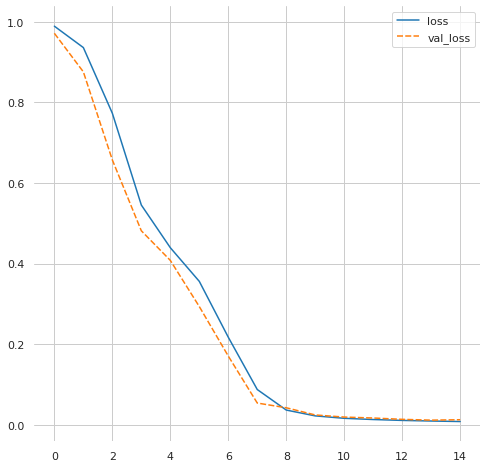

In [14]:
hist = M.fit(D[:900, :20], (XY[:900, :20]), 
             validation_data=(D[900:], (XY[900:])), 
             epochs=15, verbose=VerboseFlag)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)
pd.DataFrame(hist.history).tail(n=1)

## Model examination, looking at the learned embedding

[-0.04669525  0.03969946 -0.07484529  0.04578747]


<AxesSubplot:>

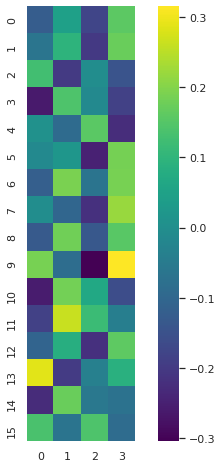

In [15]:
w = M.weights[0].numpy().T
print(w.mean(0))
sns.heatmap(w, square=True, cmap='viridis')

### Model examination, looking at the encoded state

In [16]:
Encoder = K.Model(inputs=[inp], outputs=[enc])

In [17]:
def activations(Encoder, sim=0): 
    pdf = df.pivot('sim', 't')
    d_tr = pdf.d_tr.to_numpy()[sim:][:1]
    d    = pdf.d.to_numpy()[sim:][:1]
    data = Encoder(d_tr).numpy().squeeze().T
    sns.set(rc={'figure.figsize': (13, 4)})
    sns.heatmap(data=data, square=True, xticklabels=d.squeeze(), cmap='icefire')    

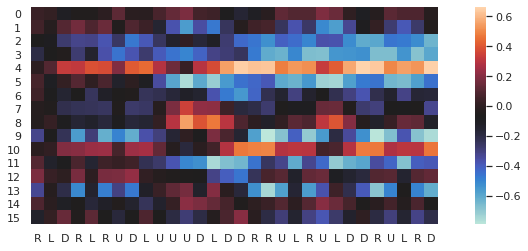

In [18]:
activations(Encoder)

In [19]:
from sklearn.decomposition import PCA

In [20]:
def pca_plots(Encoder):
    encoded = Encoder(D).numpy()
    encoded = encoded.reshape(-1, encoded.shape[-1])
    pca = PCA(2).fit_transform(encoded)
    sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=df.pos.values, hue_order=sorted(np.unique(df.pos.values)), palette='tab10')

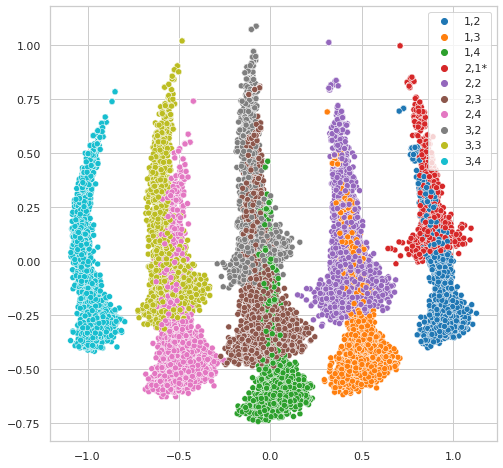

In [21]:
pca_plots(Encoder)

## Second model: predict next direction (language model)

many-to-many, categorical output

In [22]:
Next_D = D[:, 1:]
Init_D = D[:, :-1]
print(Init_D[0])
print(' ' + ' /' * 28)
print(Next_D[0])
print(Next_D.shape, Init_D.shape)

[3 2 0 3 2 3 1 0 2 1 1 1 0 2 0 0 3 3 1 2 3 1 2 0 0 3 1 2 3]
  / / / / / / / / / / / / / / / / / / / / / / / / / / / /
[2 0 3 2 3 1 0 2 1 1 1 0 2 0 0 3 3 1 2 3 1 2 0 0 3 1 2 3 0]
(1000, 29) (1000, 29)


In [23]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 16)(x)
x = enc = L.LSTM(16, return_sequences=True)(x)
x = L.Dense(4, 'softmax', name='next_d')(x)
M = K.Model(inputs=[inp], outputs=[x])
M.summary()
M.compile('adam', ['sparse_categorical_crossentropy'], ['accuracy'])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          64        
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 16)          2112      
_________________________________________________________________
next_d (Dense)               (None, None, 4)           68        
Total params: 2,244
Trainable params: 2,244
Non-trainable params: 0
_________________________________________________________________


,loss,accuracy,val_loss,val_accuracy
9,1.157401,0.384944,1.169443,0.381379


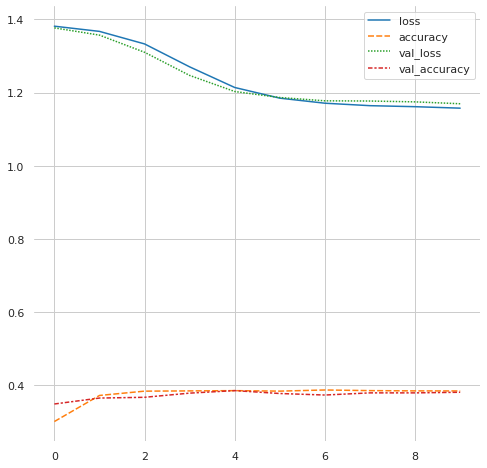

In [24]:
hist = M.fit(Init_D[:900, :20], Next_D[:900, :20], 
             validation_data=(Init_D[900:], Next_D[900:]), 
             epochs=10, verbose=VerboseFlag)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)
pd.DataFrame(hist.history).tail(n=1)

In [25]:
Encoder = K.Model(inputs=[inp], outputs=[enc])

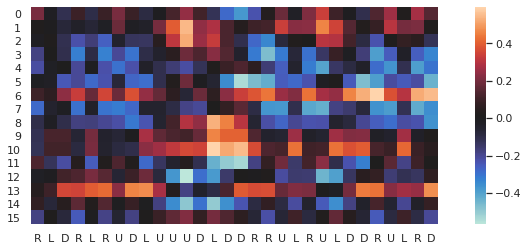

In [26]:
activations(Encoder)

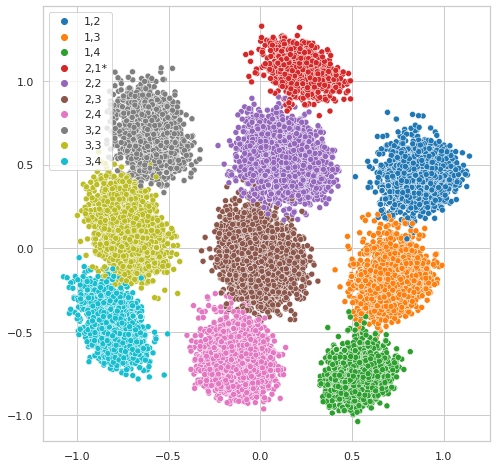

In [27]:
pca_plots(Encoder)

## Third model: classify if sequence ever visits 2,1*

many-to-one, categorical output

In [28]:
len(df[df.pos == '2,1*'].sim.unique()), len(df.sim.unique())

(597, 1000)

In [29]:
Stars = (df.pivot('sim', 't').pos == '2,1*').to_numpy()
Star_Train = Stars[:, :20].any(-1).astype(int)
Star_Valid = Stars.any(-1).astype(int)
pd.concat([
    pd.Series(Star_Train).describe(),
    pd.Series(Star_Valid).describe(),
], axis=1)

,0,1
count,1000.000000,1000.000000
mean,0.449000,0.597000
std,0.497641,0.490746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [30]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 16)(x)
x = enc = L.LSTM(16, return_sequences=False)(x)  # many-to-one!
x = L.Dense(1, 'sigmoid', name='reaches_star')(x)
M = K.Model(inputs=[inp], outputs=[x])
M.summary()
M.compile('adam', ['binary_crossentropy'], ['accuracy'])

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          64        
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
reaches_star (Dense)         (None, 1)                 17        
Total params: 2,193
Trainable params: 2,193
Non-trainable params: 0
_________________________________________________________________


,loss,accuracy,val_loss,val_accuracy
24,0.487684,0.782222,0.523924,0.74


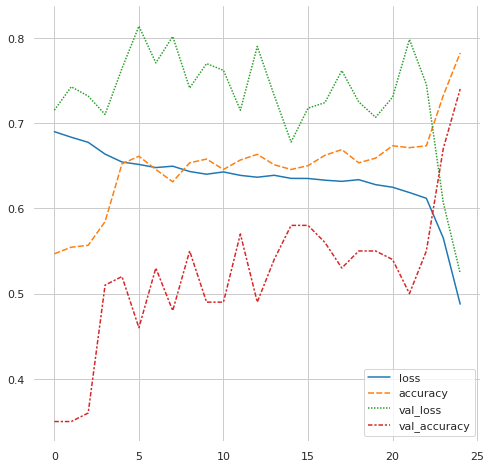

In [31]:
hist = M.fit(D[:900, :20], Star_Train[:900], 
             validation_data=(D[900:], Star_Valid[900:]), 
             epochs=25, verbose=VerboseFlag)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)
pd.DataFrame(hist.history).tail(n=1)

The model's LSTM does not return the encoded states. To get them: make an identical network, stopping after the encoder, and copy the weights over.

In [32]:
x = inp = K.Input((None, ))
x = L.Embedding(4, 16)(x)
x = L.LSTM(16, return_sequences=True)(x)
Encoder = K.Model(inputs=[inp], outputs=[x])

In [33]:
print([w.shape for w in M.get_weights()])
print([w.shape for w in Encoder.get_weights()])

[(4, 16), (16, 64), (16, 64), (64,), (16, 1), (1,)]
[(4, 16), (16, 64), (16, 64), (64,)]


In [34]:
Encoder.set_weights(M.get_weights()[:len(Encoder.get_weights())])

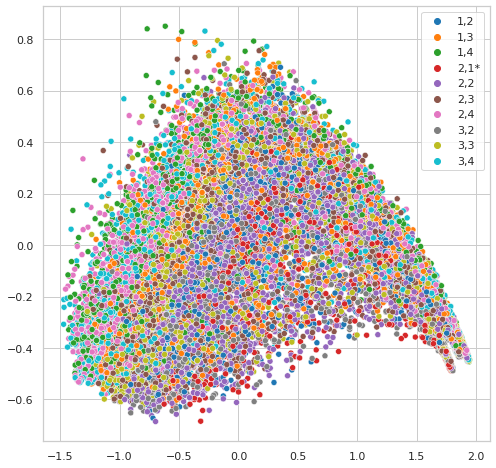

In [35]:
pca_plots(Encoder)

## Model four: step sizes of varying length, predict coordinates

We will associate each step with the length of the step and feed this as input to the model as well.

many-to-many, multiple inputs: direction is categorical and step size continuous.

In [36]:
[
    ','.join([
        alts_at(x, y).rjust(4)
        for x in np.linspace(0, 5, num=10)
    ])    
    for y in np.linspace(0, 6, num=12)   
]

['    ,    ,    ,    ,   D,   D,    ,    ,    ,    ',
 '    ,    ,    ,    ,   D,   D,    ,    ,    ,    ',
 '    ,    ,  DR,  DR,   D,   D,  DL,  DL,    ,    ',
 '    ,    ,  DR,  DR,   D,   D,  DL,  DL,    ,    ',
 '   R,   R,  DR,  DR,DULR,DULR,  DL,  DL,   L,    ',
 '   R,   R,  DR,  DR,DULR,DULR,  DL,  DL,   L,    ',
 '   R,   R, DUR, DUR,DULR,DULR, DUL, DUL,   L,    ',
 '   R,   R, DUR, DUR,DULR,DULR, DUL, DUL,   L,    ',
 '   R,   R,  UR,  UR, ULR, ULR,  UL,  UL,   L,    ',
 '   R,   R,  UR,  UR, ULR, ULR,  UL,  UL,   L,    ',
 '    ,    ,   U,   U,   U,   U,   U,   U,    ,    ',
 '    ,    ,    ,    ,    ,    ,    ,    ,    ,    ']

In [37]:
def simulate_with_ss(Timesteps):
    x, y = start_x, start_y
    rows = []
    for t in range(Timesteps):
        ss = rng.uniform(0.5, 1.0)
        row = randstep(x, y, ss)
        x, y = row['x'], row['y']
        row['ss'] = ss
        row['t'] = t
        rows += [row]
    return pd.DataFrame(rows) 

simulate_with_ss(5)

,x,y,d,ss,t
0,2.723477,3.000000,R,0.723477,0
1,2.723477,2.050423,U,0.949577,1
2,2.723477,1.532390,U,0.518032,2
3,2.723477,2.102374,D,0.569983,3
4,3.574754,2.102374,R,0.851277,4


In [38]:
dfs = []
N = 10000
T = 30
for i in range(N):
    df1 = simulate_with_ss(T)
    df1['sim'] = i
    dfs += [df1]
ssdf = pd.concat(dfs, axis='index').reset_index(drop=True)
ssdf['d_tr'] = ssdf.d.map(tr)
ssdf.head()

,x,y,d,ss,t,sim,d_tr
0,2.597579,3.000000,R,0.597579,0,0,3
1,3.305034,3.000000,R,0.707455,1,0,3
2,3.305034,3.665451,D,0.665451,2,0,0
3,3.305034,4.188630,D,0.523179,3,0,0
4,3.305034,3.413230,U,0.775400,4,0,1


In [39]:
ssdf.describe()

,x,y,ss,t,sim,d_tr
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,2.435670,3.294428,0.750174,14.500000,4999.500000,1.426253
std,0.674146,0.784155,0.144354,8.655456,2886.756143,1.132469
min,1.000151,1.004576,0.500000,0.000000,0.000000,0.000000
25%,1.957392,2.710423,0.625067,7.000000,2499.750000,0.000000
50%,2.442904,3.294369,0.750344,14.500000,4999.500000,1.000000
75%,2.925099,3.894963,0.875438,22.000000,7499.250000,2.000000
max,3.993106,4.991108,0.999999,29.000000,9999.000000,3.000000


Data to numpy matrices.

In [40]:
pdf = ssdf.pivot('sim', 't')
ssD = pdf.d_tr.to_numpy()
ssX = zmuv(pdf.x.to_numpy())
ssY = zmuv(pdf.y.to_numpy())
SS = zmuv(pdf.ss.to_numpy())[:, :, np.newaxis]
print('ssD', ssD.shape, np.unique(ssD))
print('ssX', ssX.shape)
print('ssY', ssY.shape)
print('SS ', SS.shape)

ssD (10000, 30) [0 1 2 3]
ssX (10000, 30)
ssY (10000, 30)
SS  (10000, 30, 1)


In [41]:
x = inp = K.Input((None, ))
inp_ss = K.Input((None, 1))
x = L.Embedding(4, 16)(x)
x = L.concatenate([x, inp_ss])
x = enc = L.LSTM(16, return_sequences=True)(x)
px = L.Dense(1, name='x')(x)
py = L.Dense(1, name='y')(x)
M = K.Model(inputs=[inp, inp_ss], outputs=[px, py])
M.summary()
M.compile('adam', ['mean_squared_error', 'mean_squared_error'])

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 16)     64          input_5[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, 17)     0           embedding_5[0][0]                
                                                                 input_6[0][0]        

,loss,x_loss,y_loss,val_loss,val_x_loss,val_y_loss
2,0.015043,0.010054,0.004989,0.014137,0.008955,0.005182


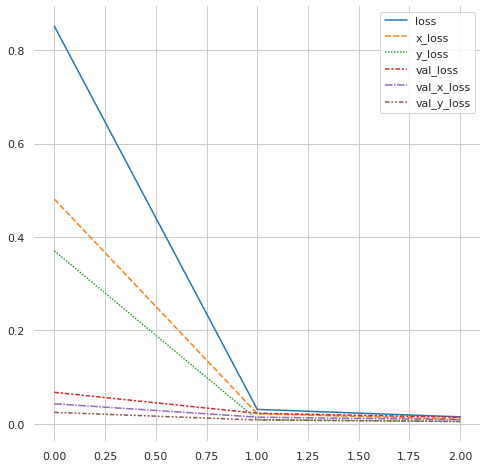

In [42]:
hist = M.fit((ssD[:9000, :20], SS[:9000, :20]), (ssX[:9000, :20], ssY[:9000, :20]), 
             validation_data=((ssD[9000:], SS[9000:]), (ssX[9000:], ssY[9000:])), 
             epochs=3, verbose=VerboseFlag)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)
pd.DataFrame(hist.history).tail(n=1)

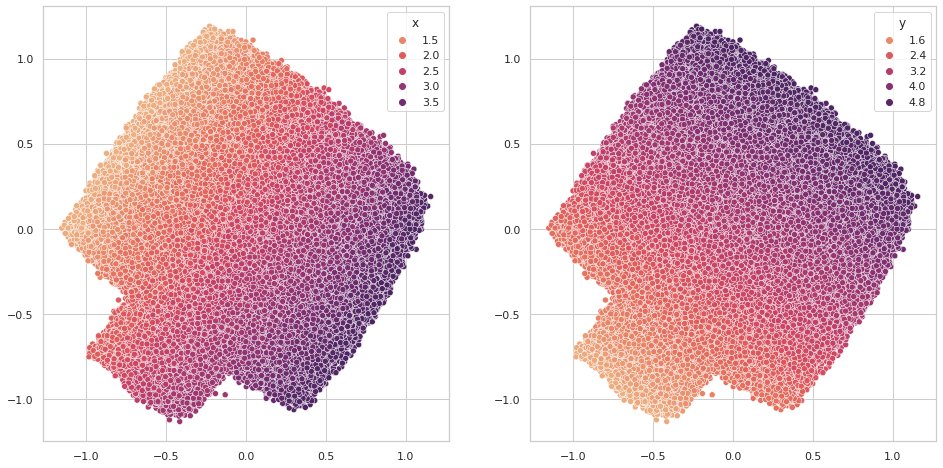

In [43]:
def pca_ss_plots(Encoder):
    encoded = Encoder((ssD, SS)).numpy()
    encoded = encoded.reshape(-1, encoded.shape[-1])
    pca = PCA(2).fit_transform(encoded)
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    sns.set(style='whitegrid')
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=ssdf.x, palette='flare', ax=axs[0])
    sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=ssdf.y, palette='flare', ax=axs[1])

pca_ss_plots(K.Model(inputs=[inp, inp_ss], outputs=[enc]))

## Model five: variable step size, classification

Classify if the walk ever reaches the top part, $y < 2$.

many-to-one, binary output

In [44]:
ssStar = (ssdf.pivot('sim', 't').y < 2).to_numpy()
ssStar_Train = ssStar[:, :20].any(axis=-1).astype(int)
ssStar_Valid = ssStar.any(axis=-1).astype(int)
pd.concat([
    pd.Series(ssStar_Train).describe(),
    pd.Series(ssStar_Valid).describe(),
], axis=1)

,0,1
count,10000.000000,10000.000000
mean,0.422000,0.540600
std,0.493903,0.498374
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [45]:
x = inp = K.Input((None, ))
inp_ss = K.Input((None, 1))
x = L.Embedding(4, 16)(x)
x = L.concatenate([x, inp_ss])
x = L.LSTM(128, return_sequences=False)(x)
x = L.Dense(1, 'sigmoid', name='star')(x)
M = K.Model(inputs=[inp, inp_ss], outputs=[x])
M.summary()
M.compile('adam', ['binary_crossentropy'], ['accuracy'])

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 16)     64          input_7[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, 17)     0           embedding_6[0][0]                
                                                                 input_8[0][0]        

In [ ]:
hist = M.fit((ssD[:9000, :20], SS[:9000, :20]), ssStar_Train[:9000], 
             validation_data=((ssD[9000:], SS[9000:]), ssStar_Valid[9000:]), 
             epochs=10, verbose=VerboseFlag)
sns.set(style='whitegrid', rc={'figure.figsize': (8, 8)})
sns.lineplot(data=hist.history, palette='tab10')
sns.despine(left=True, bottom=True)
pd.DataFrame(hist.history).tail(n=1)

Copy the weights to make the encoder.

In [ ]:
x = inp = K.Input((None, ))
inp_ss = K.Input((None, 1))
x = L.Embedding(4, 16)(x)
x = L.concatenate([x, inp_ss])
x = enc = L.LSTM(128, return_sequences=True)(x)
Encoder = K.Model(inputs=[inp, inp_ss], outputs=[enc])

In [ ]:
print([w.shape for w in M.get_weights()])
print([w.shape for w in Encoder.get_weights()])

In [ ]:
Encoder.set_weights(M.get_weights()[:len(Encoder.get_weights())])

In [ ]:
pca_ss_plots(Encoder)

## Embeddings

* With words as token lexicon gets big 
    - in language processing 20k, 200k, 2M words
    - use dimensionality reduction 
    - to 300 and 768 are common
* Can be pretrained: `word2vec` Skip-gram Negative Sampling (SGNS), [Mikolov et al (2013)](https://arxiv.org/abs/1301.3781)
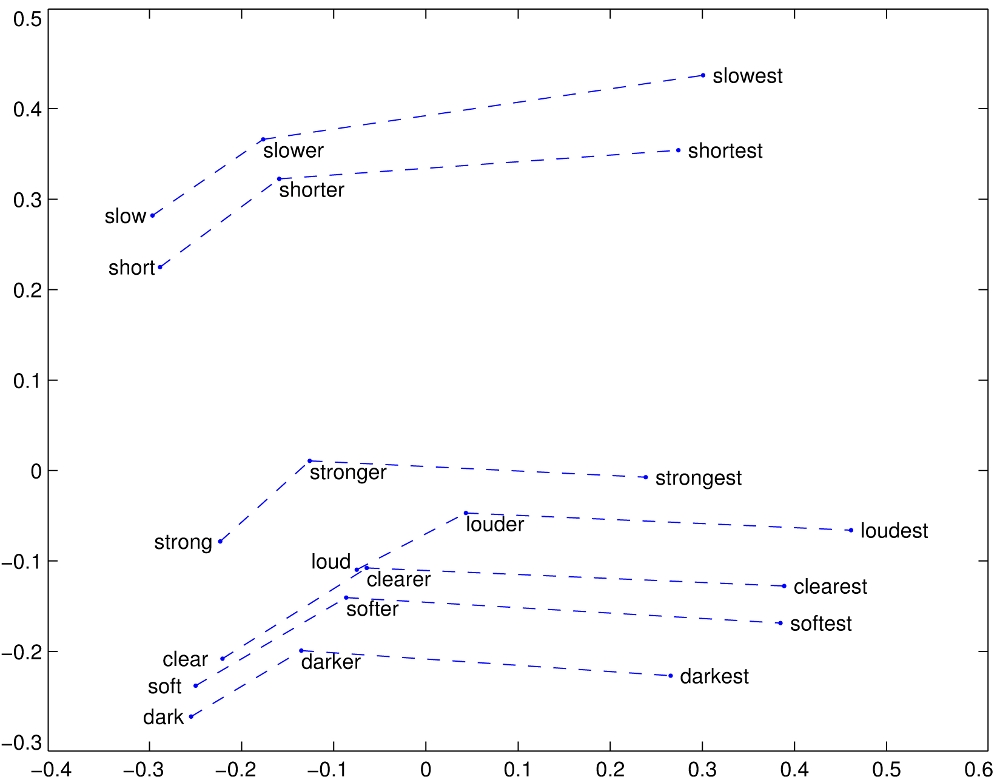

_Image from https://nlp.stanford.edu/projects/glove/_

## Stacking LSTMs

Return the encoded states for earlier layers with `return_sequences=True`.

```python
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
```

Skip-like connections between layers: Highway networks, [Srivastava et al (2015)](https://arxiv.org/abs/1505.00387v2) or add them together [Wu et al (2016)](https://arxiv.org/abs/1609.08144)

## Bidirectional LSTMs

Rough pseudo-code:
```python
BiLSTM(xs) = concat(LSTM(xs), reversed(LSTM(reversed(xs))))
```

In keras:
```python
x = Bidirectional(LSTM(128, return_sequences=True))(x)
# x.shape = [Batch, Timesteps, 128 * 2]
```

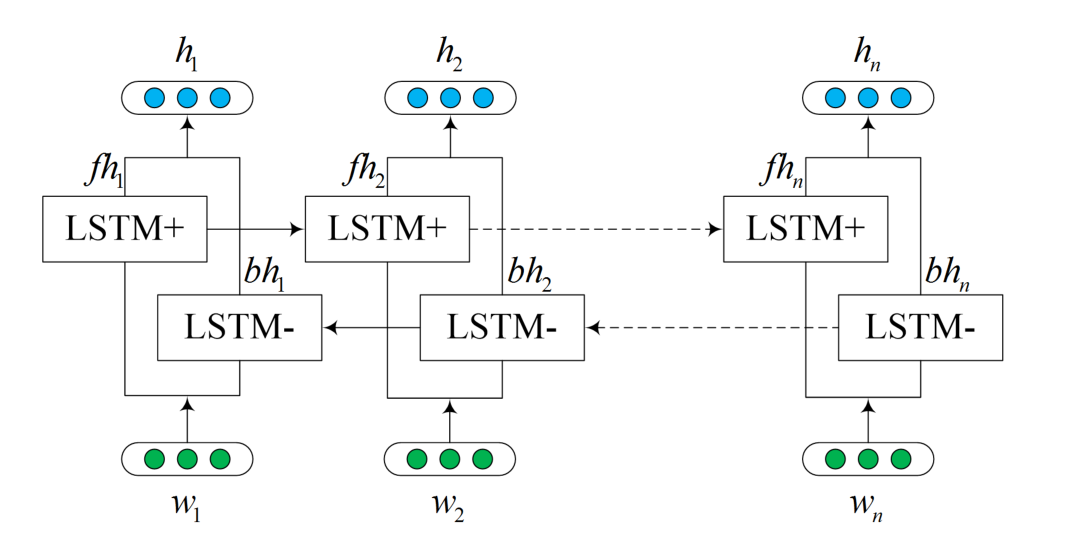

* Encoded representation contains information both from the past and the future.
* Adding another layer theoretically allows information from the whole sequence to be used everywhere.
* Handles masking for sequences of different lengths correctly!

_Image from https://www.researchgate.net/publication/337748590_Self-Attention-Based_BiLSTM_Model_for_Short_Text_Fine-grained_Sentiment_Classification_

## Beyond LSTMs

* Gated Recurrent Unit, GRU, introduced in Cho et al 2014. 75% parameters of the LSTM. Strictly less expressive: LSTMs can count without bound and GRUs cannot.
  
  Footnote in Cho's thesis, 2015, 4.3.2: 
  > Okay, let me confess here. I was not well aware of long short-term memory when I was designing the gated recurrent unit together with Yoshua Bengio and Caglar Gulcehre in 2014.
  
* GRU + attention: _Neural Machine Translation by Jointly Learning to Align and Translate_ [Bahdanau, Cho & Bengio (2015)](https://arxiv.org/abs/1409.0473v7)
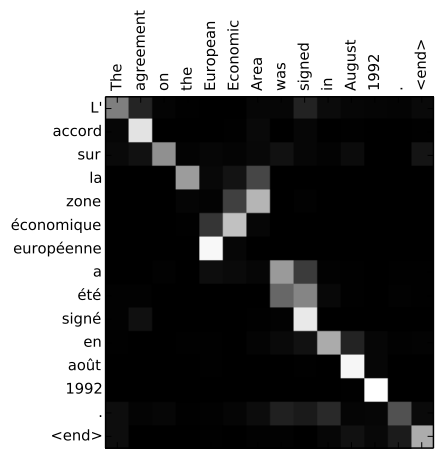

## Transformer architecture

* [Vaswani et al (2017)](https://arxiv.org/abs/1706.03762v5): _Attention is All You Need_ introducing the transformer structure for machine translation of sequences using only the attention mechanism.

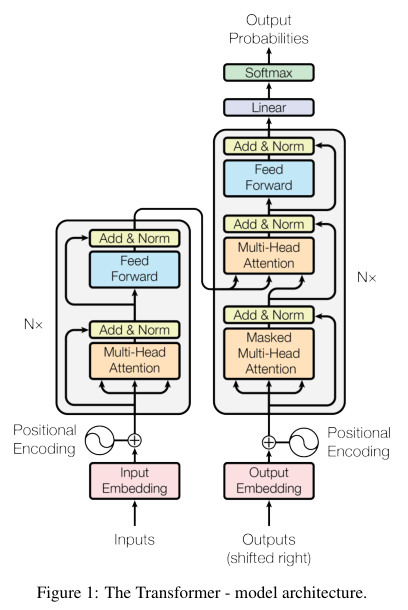

## BERT: Transformer for language modelling

Bidirectional: cannot use next-word prediction. Instead masked language modelling.  

* [Devlin et al (2018)](https://arxiv.org/abs/1810.04805v2): _BERT: Bidirectional Encoder Representations using Transformers_.

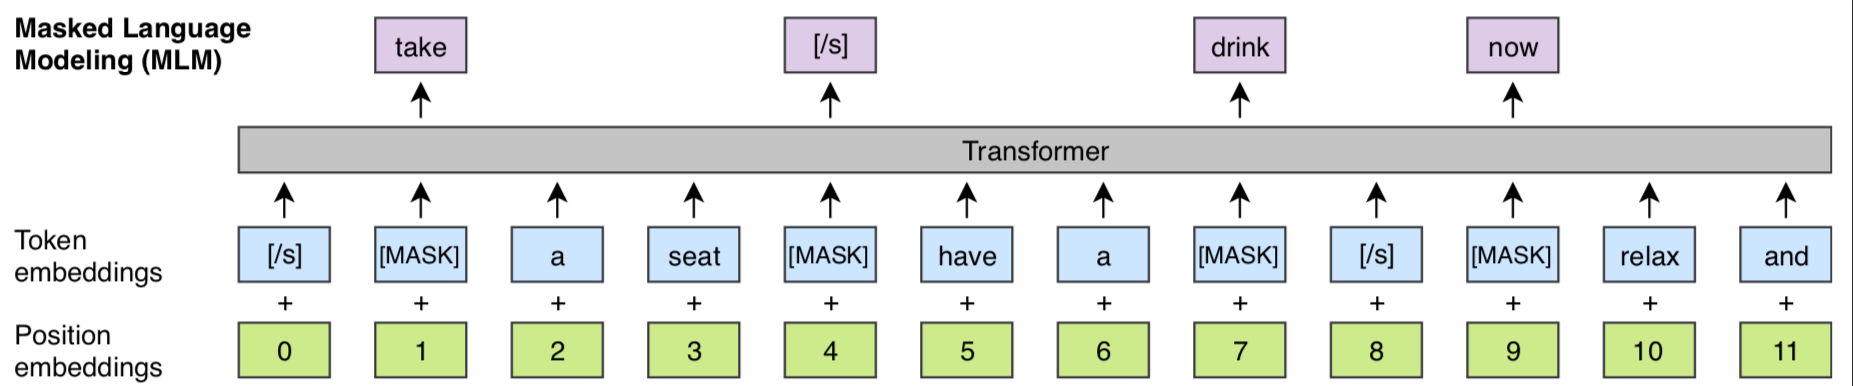

_Image from Cross-lingual Language Model Pretraining [Lample & Conneau (2019)](https://arxiv.org/abs/1901.07291)_

## Transformers for longer sequences

Original transformer architecture is $O(n^2)$ making it impractical for longer sequences. A flurry of work have decreased this to linear such as _Big Bird: Transformers for Longer Sequences_
[(Zaheer et al, 2020)](https://arxiv.org/abs/2007.14062v1). It features genomic data and reports improved results on:

* Promoter region prediction
* Chromatin-profile prediction


## Summary

* You now know how to model sequences using an encoder!

* We used LSTM as encoder
    - Newer models - transformers - are also encoders
    - Can be trained unsupervised language model

* We have seen various setups of this: 
    * many-to-many
    * many-to-one 
    * categorical input and output
    * continuous input and output
    * multiple inputs and outputs

* The encoded states can be examined to see what the model learns

Exercises: tinker with and break these examples

# Exercises
    
1. Make the starting position randomly chosen and work with the first model.
    1. Check the accuracy and plot the PCA.
    2. Plot the distance from the prediction to the truth as a function of taken steps.
    ```python
    xy = M.predict(D)
    dist = np.hypot(X - xy[:,:,0], Y - xy[:,:,1])
    sns.lineplot(data=dist.mean(0))
    print(np.max(dist.mean(0)))
    ```
    What do you observe and why?
    3. Experiment with adding another layer and making layers bidirectional. What do you observe and why?

2. Try overfitting the networks. Now we train on 20 timesteps and validate on 30 timesteps. Can dramatically lowering the number of training timesteps make it to overfit?

3. Explore freely by: 
    * changing the world layout,
    * _not_ feeding the step lengths in the step-size models,
    * changing LSTM encoder size (How small can it get?),
    * stacking LSTMs,
    * making them bidirectional,
    * changing to GRUs or SimpleRNN,
    * changing to Conv1D,
    * using your imagination!

4. The PCA of the encoded states sometimes contains noise. But we expect it to contain the x and y coordinate. We can check if they are in the encoded states with a "diagnostic classifier". Make one like this: freeze the encoder weights (set trainable to False) and linearly try to predict the x and y coordinate. If this is possible the encoded states have that information readily available. 